# Prática: Breve introdução ao processamento de imagens

Bibliotecas interessantes:

- **Numpy**
- **OpenCV**
- imageio
- matplotlib

In [27]:
# !pip install opencv-python

In [ ]:
# https://images.pexels.com/photos/101667/pexels-photo-101667.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1

In [1]:
import numpy as np
import imageio.v3 as imageio
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Cavalo Preto.jpg')

h, w = img.shape[:2]

print(f'Height = {h} Width = {w}')

Height = 3383 Width = 5075


In [2]:
img.shape

(3383, 5075, 3)

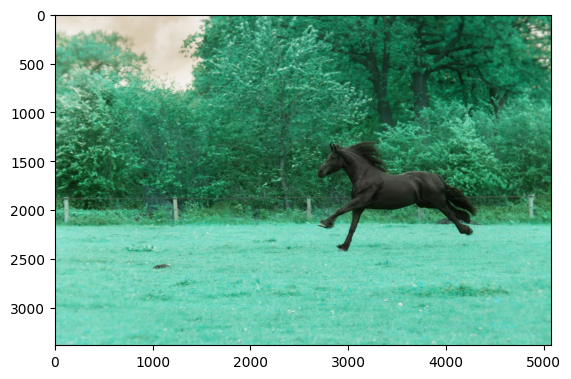

In [29]:
plt.imshow(img)

In [3]:
w_window = 800
h_window = 600

ratio = min(w_window / w, h_window / h)

new_w = int(w * ratio)
new_h = int(h * ratio)

resized_img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)


cv2.imshow('', resized_img)

cv2.waitKey(0)

cv2.destroyAllWindows()

In [31]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


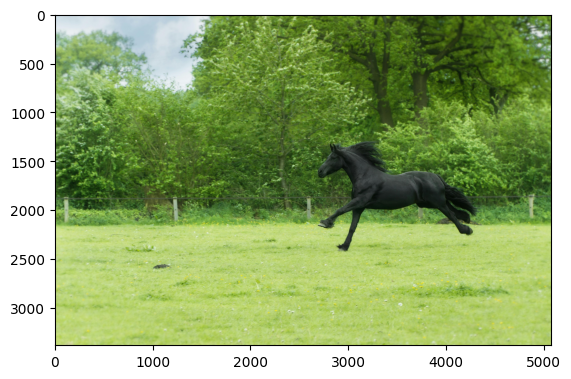

In [32]:
plt.imshow(img)

In [33]:
(R, G, B) = cv2.split(img)


In [34]:
np.zeros_like

<function numpy.zeros_like(a, dtype=None, order='K', subok=True, shape=None)>

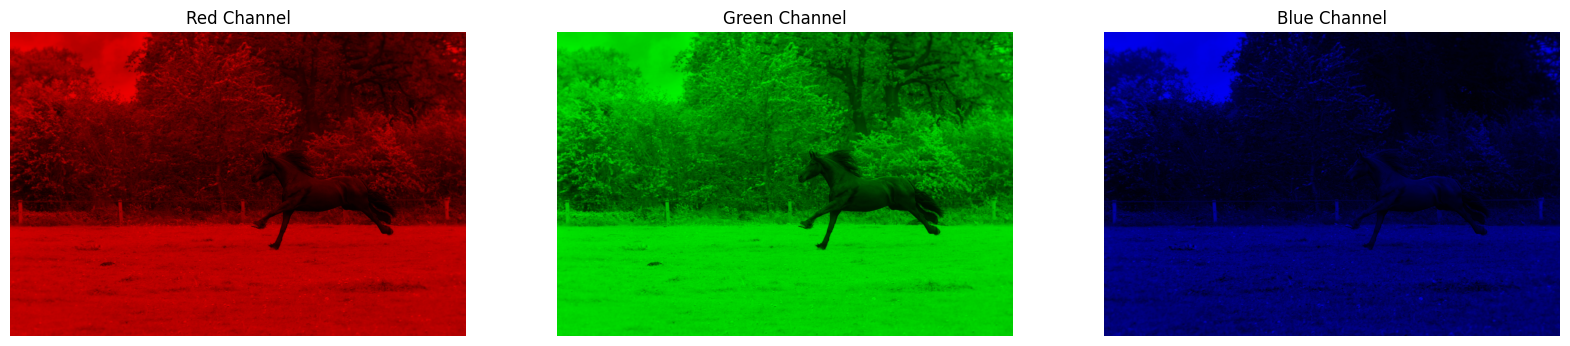

In [35]:
img_R = cv2.merge([R, np.zeros_like(G), np.zeros_like(B)])
img_G = cv2.merge([np.zeros_like(R), G, np.zeros_like(B)])
img_B = cv2.merge([np.zeros_like(R), np.zeros_like(G), B])

plt.figure(figsize=(20, 20))

plt.subplot(1, 3, 1)
plt.imshow(img_R)
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_G)
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_B)
plt.title('Blue Channel')
plt.axis('off')

plt.show()

In [38]:
print(h, w)

3383 5075


(-0.5, 1999.5, 1499.5, -0.5)

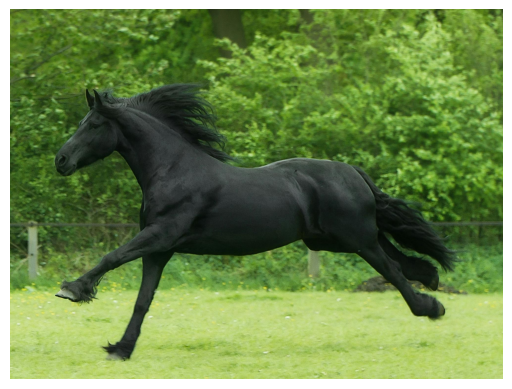

In [47]:
roi = img[1000:2500, 2500: 4500]

plt.imshow(roi)
plt.axis('off')

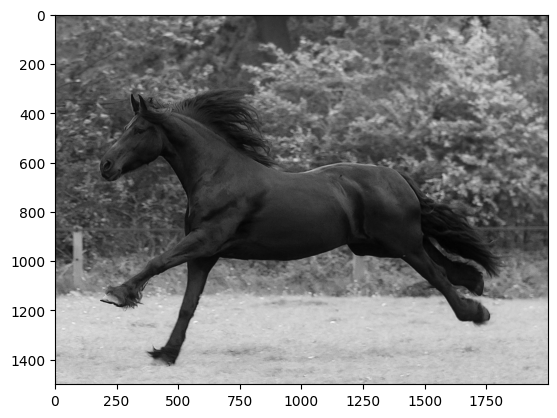

In [48]:
roi_gray = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)


plt.imshow(roi_gray, cmap='gray')

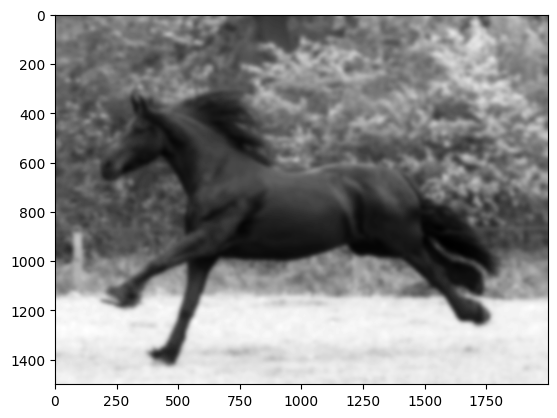

In [64]:
roi_blur = cv2.GaussianBlur(roi_gray, (51, 51), 0)

plt.imshow(roi_blur, cmap='gray')

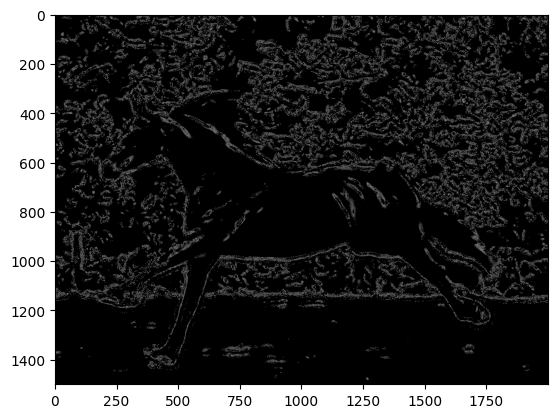

In [72]:
# Canny Edge Detection
edges = cv2.Canny(image=roi_blur, threshold1=10, threshold2=10) # Canny Edge Detection

plt.imshow(edges, cmap='gray')

In [73]:
sobelx = cv2.Sobel(src=roi_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=roi_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=roi_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

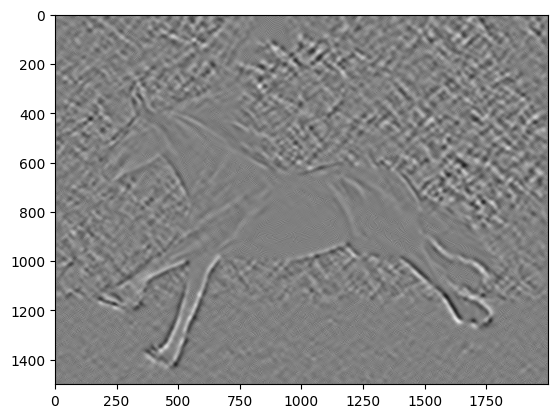

In [76]:
plt.imshow(sobelxy, cmap='gray')